In [164]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [165]:
data=pd.read_csv('/content/Fraud_check (1).csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

In [166]:
data.shape

(600, 6)

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [168]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# Checking missing value

In [169]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

# Checking duplicated value

In [170]:
data.duplicated().sum()

0

# Correlation Analysis

In [171]:
data.corr()

<ipython-input-171-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<ipython-input-172-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

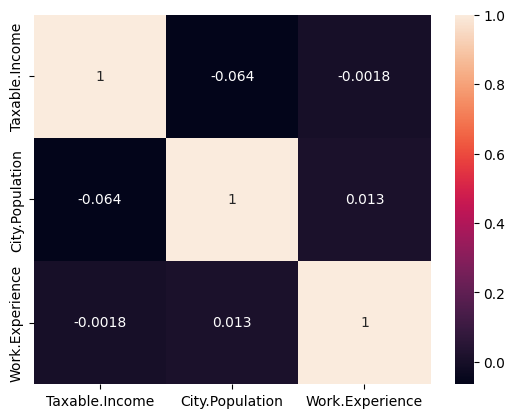

In [172]:
sns.heatmap(data.corr(),annot=True)

In [173]:
# Renaming Columns
data = data.rename({'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'},axis=1)
data.head(2)

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


In [174]:
# Creating dummy vairables for Categorical columns
data=pd.get_dummies(data,columns=['Undergrad','Marital_Status','Urban'], drop_first=True)

In [175]:
# Creating new column TaxInc and dividing 'Taxable_Income' cols on the basis of [10002,30000,99620] for Risky and Good
data["TaxInc"] = pd.cut(data["Taxable_Income"], bins = [10000,30000,99620], labels = ["Risky", "Good"])

In [176]:
data.head(3)

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good


In [177]:
# Creating a new column
data = pd.get_dummies(data,columns = ["TaxInc"],drop_first=True)

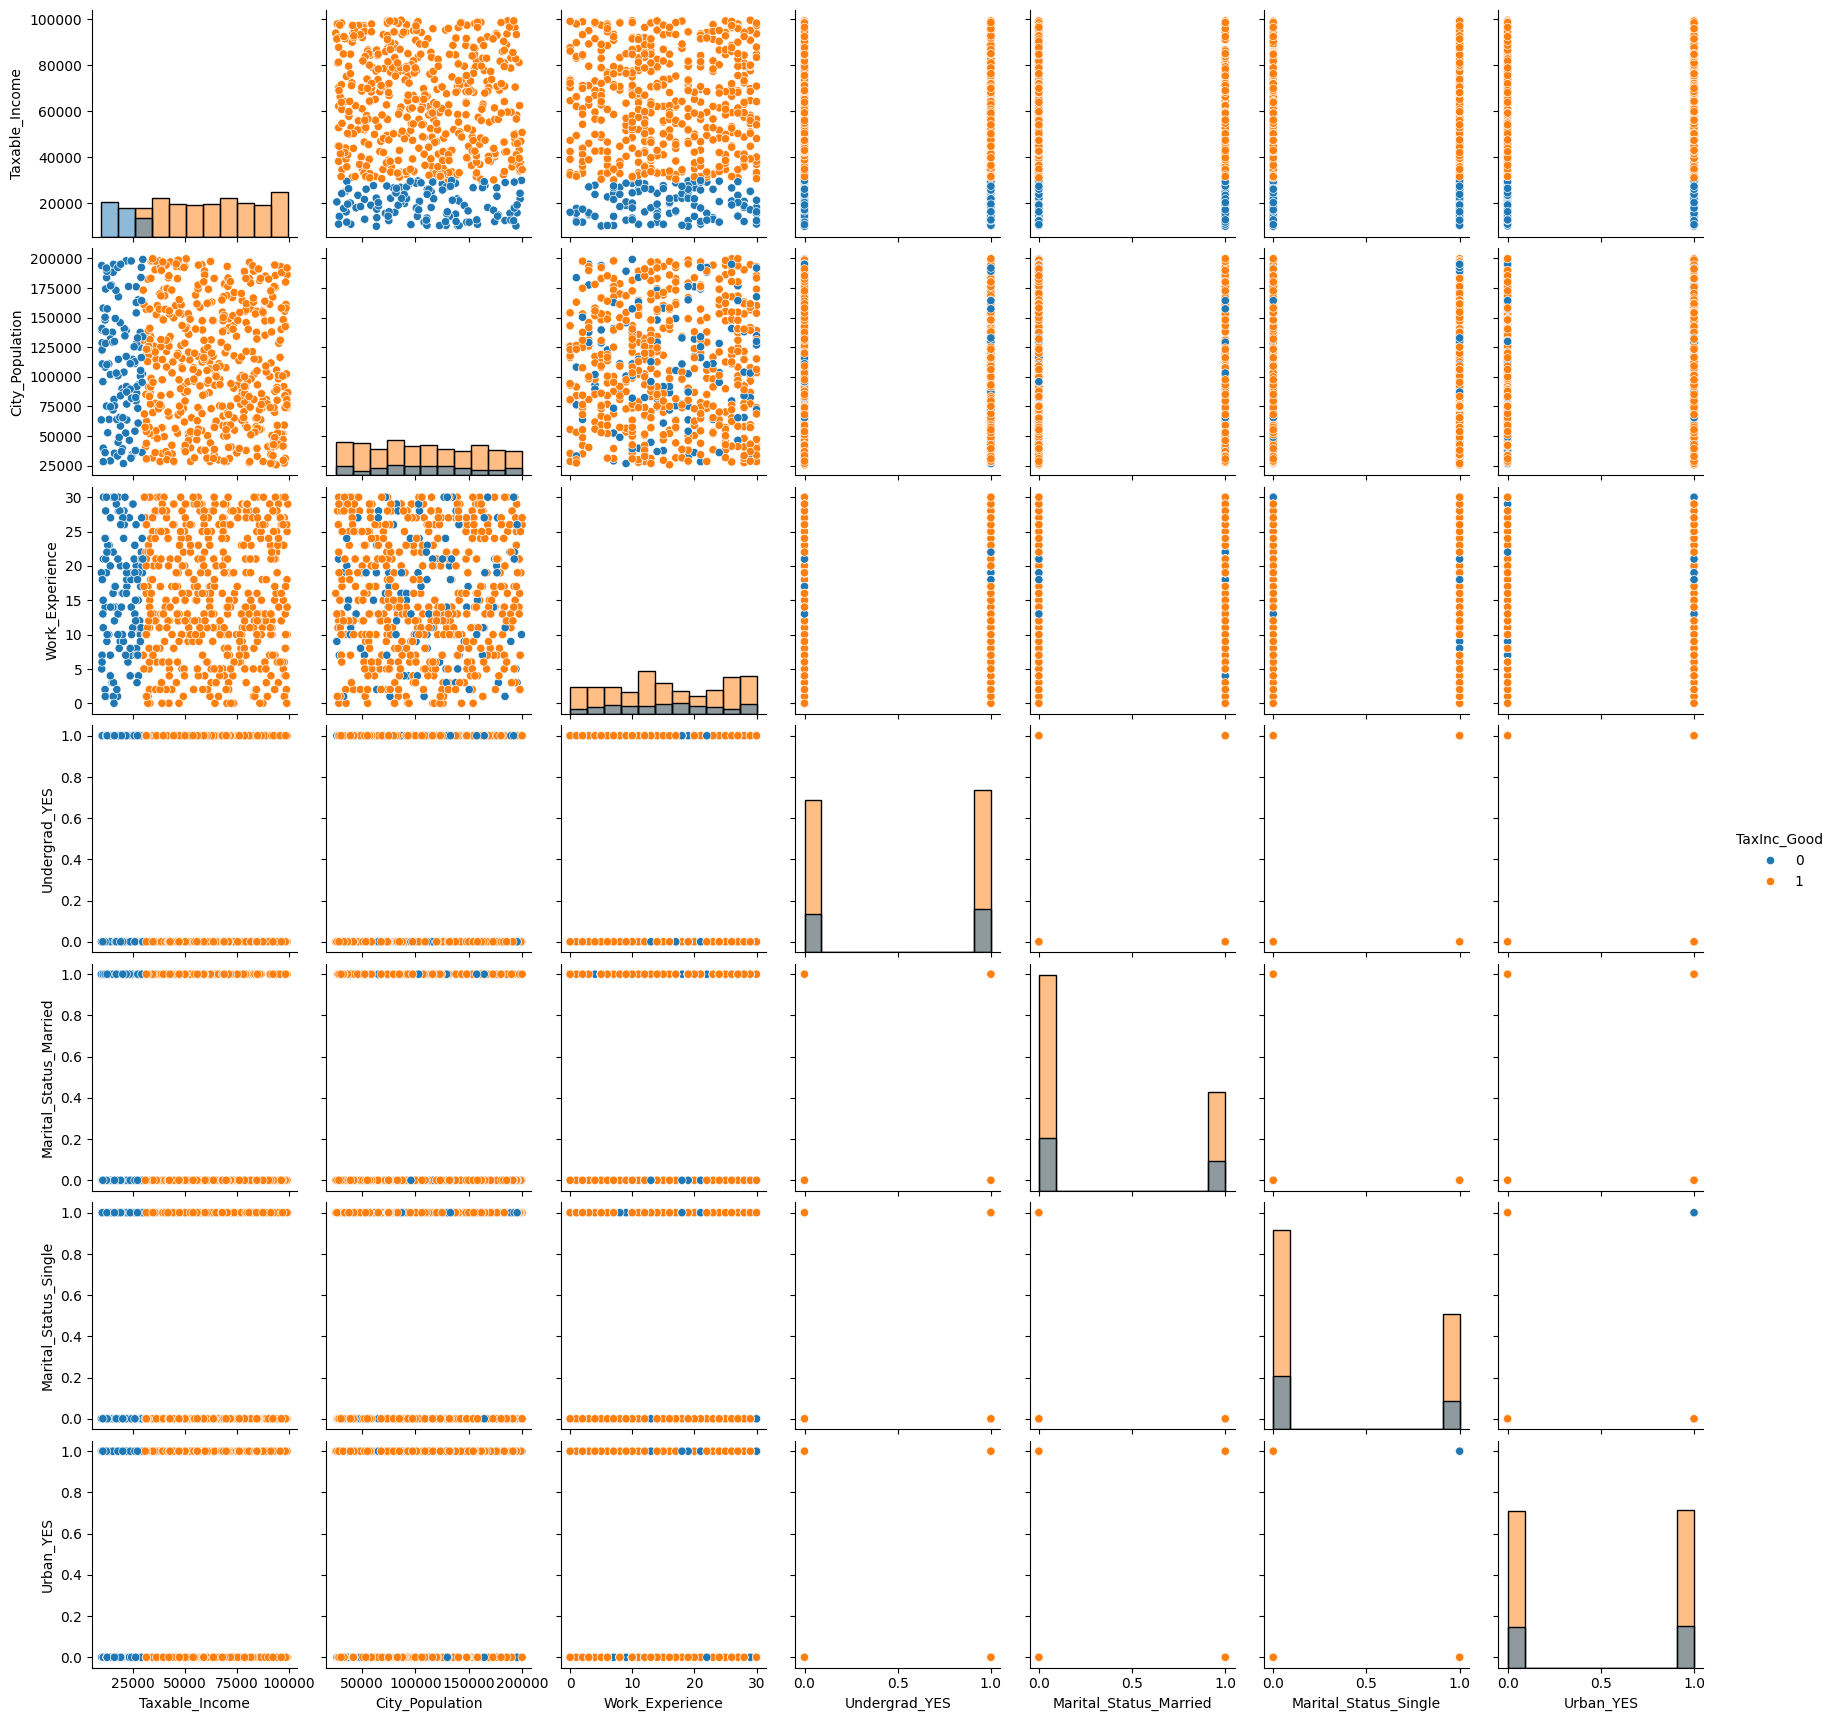

In [178]:
# Pairplot
sns.pairplot(data, hue = 'TaxInc_Good', diag_kind="hist")

In [179]:
# Defining Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [180]:
# Normaliizng  the data
data_norm = norm_func(data.iloc[:,1:])
data_norm.tail(10)

,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [181]:
# Declaring features & target
X = data_norm.drop(['TaxInc_Good'], axis=1)
y = data_norm['TaxInc_Good']

In [182]:
X.head()

,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0


In [183]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: TaxInc_Good, dtype: float64

In [184]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=7)

In [185]:
# Converting the Taxable income variable to bucketing.
data_norm["income"]="<=30000"
data_norm.loc[data["Taxable_Income"]>=30000,"income"]="Good"
data_norm.loc[data["Taxable_Income"]<=30000,"income"]="Risky"

In [186]:
# Droping the Taxable income column
data.drop(["Taxable_Income"],axis=1,inplace=True)

# Label Encoding

In [187]:
le=preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [188]:
# Splitting the data into featuers and labels
features = data.iloc[:,0:5]
labels = data.iloc[:,5]

In [189]:
# Collecting the column names
colnames = list(data.columns)
predictors = colnames[0:5]
target = colnames[5]

In [190]:
# Splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify=labels)

In [191]:
# Creating Model
model = RandomForestClassifier(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [192]:
model.n_outputs_

1

In [193]:
model.oob_score_

0.48541666666666666

In [194]:
# Predictions
prediction = model.predict(x_train)

In [195]:
# Accuracy
accuracy = accuracy_score(y_train,prediction)
accuracy

0.9833333333333333

In [196]:
np.mean(prediction == y_train)

0.9833333333333333

In [197]:
# Confusion matrix
confusion = confusion_matrix(y_train,prediction)
confusion

array([[237,   1],
       [  7, 235]])

In [198]:
# Prediction
pred_test = model.predict(x_test)

In [199]:
# Accuracy
acc_test =accuracy_score(y_test,pred_test)
acc_test

0.525

In [200]:
# Plotting a Decision tree present in Random forest
tree = model.estimators_[5]

In [201]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)

In [202]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Building Decision Tree Classifier using Entropy Criteria

In [203]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [204]:
from sklearn import tree


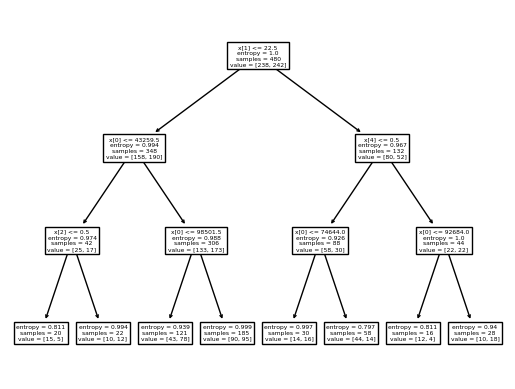

In [205]:
# PLotting the decision tree
tree.plot_tree(model);

In [206]:
colnames = list(data.columns)
colnames

['City_Population',
 'Work_Experience',
 'Undergrad_YES',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Urban_YES',
 'TaxInc_Good']

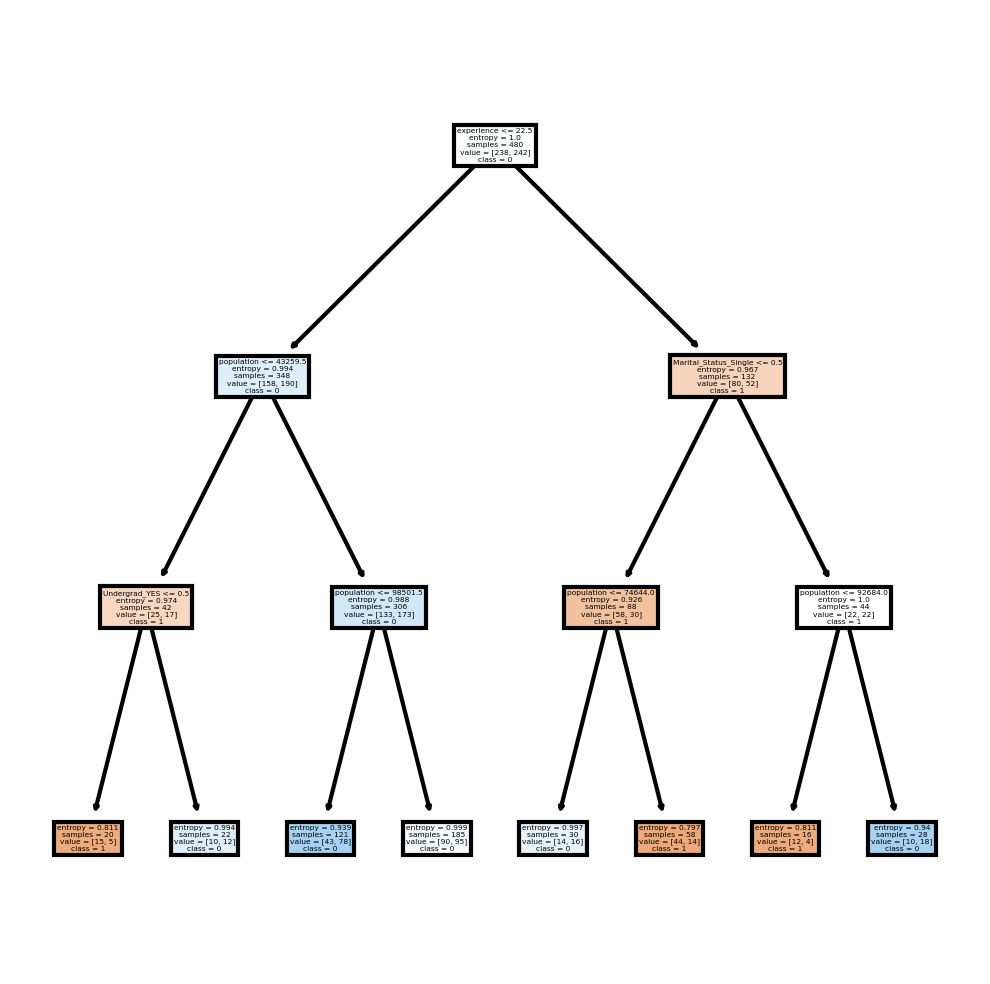

In [207]:
fn=['population','experience','Undergrad_YES','Marital_Status_Married','Marital_Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [208]:
# Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    97
0    23
dtype: int64

In [209]:
preds

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [210]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Urban_YES,,
0,10,50
1,13,47


In [211]:
# Accuracy
np.mean(preds==y_test)

0.475

# Building Decision Tree Classifier using Gini Criteria

In [212]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [213]:
# Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.475

# Decision Tree Regression

In [214]:
array = data.values
X = array[:,0:3]
y = array[:,3]

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [216]:
model_new = DecisionTreeRegressor()
model_new.fit(X_train, y_train)

DecisionTreeRegressor()

In [217]:
# Checking the accuracy
model_new.score(X_test,y_test)

-1.4420576596947425